In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
centroids = [(-5, -5),(5, 5), (-2.5,2.5), (2.5,-2.5)]
cluster_std = [1, 1,1,1]

In [3]:
X, y = make_blobs(n_features=2, n_samples=100, cluster_std= cluster_std, centers= centroids, random_state=2)

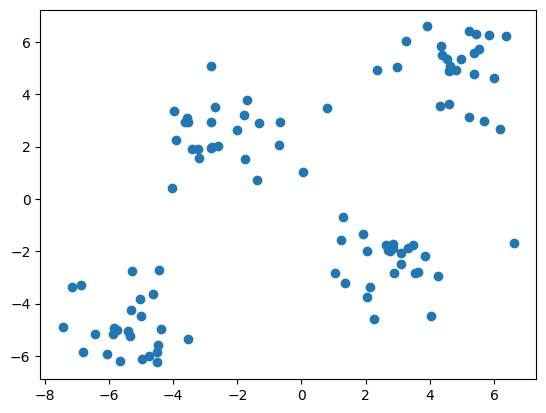

In [4]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [5]:
import random
import numpy as np

class KMeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self,X):

        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            # assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # move centroids
            self.centroids = self.move_centroids(X,cluster_group)
            # check finish
            if (old_centroids == self.centroids).all():
                break

        return cluster_group

    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids: 
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        new_centroids = []

        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)

This Python code implements the K-means clustering algorithm from scratch. Here's a breakdown of each part:

1. **Initialization** (`__init__` method):
   - The `__init__` method initializes the KMeans object with parameters `n_clusters` (number of clusters, defaulting to 2) and `max_iter` (maximum number of iterations, defaulting to 100). It also initializes `centroids` to `None`.

2. **Fit-Predict** (`fit_predict` method):
   - This method takes a dataset `X` as input and performs K-means clustering.
   - It randomly selects `n_clusters` data points from `X` as the initial centroids.
   - Then, it iteratively assigns data points to the nearest centroid (`assign_clusters` method) and updates the centroids (`move_centroids` method) until convergence or until the maximum number of iterations (`max_iter`) is reached.
   - Finally, it returns the cluster assignments for each data point.

3. **Assign Clusters** (`assign_clusters` method):
   - This method assigns each data point in `X` to the nearest centroid.
   - It calculates the Euclidean distance between each data point and each centroid.
   - For each data point, it finds the centroid with the minimum distance and assigns the data point to that centroid's cluster.

4. **Move Centroids** (`move_centroids` method):
   - This method updates the centroids based on the mean of the data points assigned to each cluster.
   - It calculates the mean of all data points assigned to each cluster and sets the new centroid to that mean.

Overall, the `KMeans` class provides a simple implementation of the K-means clustering algorithm, including initialization, cluster assignment, and centroid update steps. It's a basic but functional implementation suitable for educational purposes or small-scale applications. However, it may not be as efficient or optimized as existing libraries like scikit-learn's implementation.

In [6]:
km = KMeans(n_clusters=4,max_iter= 200)
y_means = km.fit_predict(X)

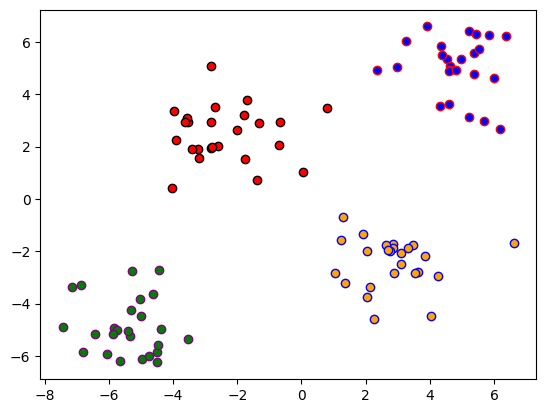

In [7]:
plt.scatter(X[y_means == 0,0], X[y_means==0,1], color = 'red', edgecolors='black')
plt.scatter(X[y_means == 1,0], X[y_means==1,1], color = 'blue', edgecolors='red')
plt.scatter(X[y_means == 2,0], X[y_means==2,1], color = 'orange', edgecolors='blue')
plt.scatter(X[y_means == 3,0], X[y_means==3,1], color = 'green', edgecolors='purple')